BL.EN.U4AIE23166
Arnav Pal
lab sheet-5

A1. If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_troin) for training a linear regression model. Sample code suggested below.

from sklearn.linear model import LinearRegression

reg = LinearRegression () .fit (X train, y_train)

y_train pred = reg.predict (X train)

(P.S .: If your project deals with a classification or clustering problem, please consider one of the attributes with numerical values as target values.)

Unique classes in dataset: ['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '4' '7' '9']
Dataset size after filtering: 1000 samples
Mean Squared Error (MSE): 33.83002347549511
R2 Score: 0.0391927442347314
Coefficient (slope): [1.17472402]
Intercept: 24.3


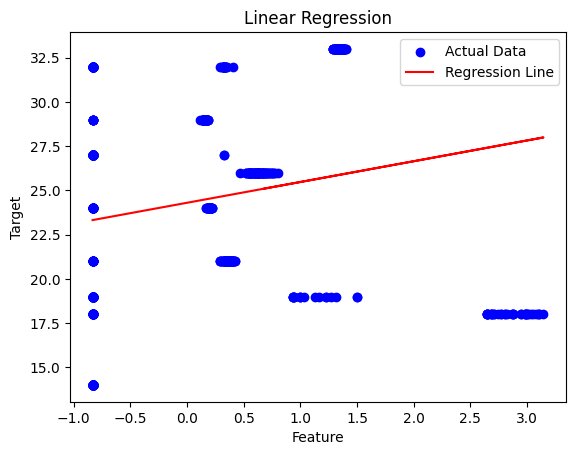

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

data_path = "data.pickle"
with open(data_path, "rb") as file:
    dataset = pickle.load(file)

df = pd.DataFrame(dataset['data'])
df['labels'] = dataset['labels']

unique_classes = df['labels'].unique()
print("Unique classes in dataset:", unique_classes)

df['labels'] = df['labels'].astype(int)

selected_classes = [14, 18, 19, 21, 24, 26, 27, 32, 33, 29]
df = df[df['labels'].isin(selected_classes)]

if df.empty:
    raise ValueError("Filtered dataset is empty. Check if the selected classes exist in your data!")

features = df.columns[:2]
target = 'labels'
X = df[features]
y = df[target]

print(f"Dataset size after filtering: {len(df)} samples")
if len(df) < 5:
    raise ValueError("Too few samples after filtering! Consider using more classes or checking data.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_reg = X_train[:, 0].reshape(-1, 1)
y_train_reg = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train

reg = LinearRegression().fit(X_train_reg, y_train_reg)

y_train_pred = reg.predict(X_train_reg)

mse = mean_squared_error(y_train_reg, y_train_pred)
r2 = r2_score(y_train_reg, y_train_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)
print("Coefficient (slope):", reg.coef_)
print("Intercept:", reg.intercept_)

plt.scatter(X_train_reg, y_train_reg, color='blue', label='Actual Data')
plt.plot(X_train_reg, y_train_pred, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. Perform prediction on the test data and compare the metric values between train and test set.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_test_reg = X_test[:, 0].reshape(-1, 1)
y_test_pred = reg.predict(X_test_reg)

mse_train = mean_squared_error(y_train_reg, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train_reg - y_train_pred) / y_train_reg)) * 100
r2_train = r2_score(y_train_reg, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")

Training Set Metrics:
MSE: 33.83002347549511, RMSE: 5.816358265744564, MAPE: 23.18433243535734, R2: 0.0391927442347314
Test Set Metrics:
MSE: 33.919971758785685, RMSE: 5.824085486905707, MAPE: 23.344291437528856, R2: 0.03663812102284336


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [18]:
X_train_all = X_train
y_train_all = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train

reg_all = LinearRegression().fit(X_train_all, y_train_all)

y_train_pred_all = reg_all.predict(X_train_all)
y_test_pred_all = reg_all.predict(X_test)

mse_train_all = mean_squared_error(y_train_all, y_train_pred_all)
r2_train_all = r2_score(y_train_all, y_train_pred_all)

mse_test_all = mean_squared_error(y_test, y_test_pred_all)
r2_test_all = r2_score(y_test, y_test_pred_all)

print("Training Set Metrics (All Attributes):")
print(f"MSE: {mse_train_all}, R2: {r2_train_all}")
print("Test Set Metrics (All Attributes):")
print(f"MSE: {mse_test_all}, R2: {r2_test_all}")

Training Set Metrics (All Attributes):
MSE: 32.41857427116163, R2: 0.07927934475542098
Test Set Metrics (All Attributes):
MSE: 33.25014008100426, R2: 0.055662025532398185


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for performing clustering. Sample code suggested below.

from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=2, random_state=0, n init="auto") .fit(X train)

kmeans. labels

kmeans.cluster_centers

(P.S .: Above code uses k = 2.)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)
print("Cluster Labels:", kmeans.labels_)
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Labels: [0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 0 1 1 

A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

from sklearn.metrics import silhouette score

from sklearn.metrics import calinski_harabasz_score

from sklearn.metrics import davies_bouldin score

kmeans = KMeans (n_clusters=2, random_state=42) .fit (X train)

silhouette score (X train, kmeans. labels )

calinski harabasz score (X train, kmeans.labels )

davies bouldin score (X train, kmeans. labels )

In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(X_train, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_train, kmeans.labels_)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.6868567493371129
Calinski-Harabasz Score: 2116.5205459237977
Davies-Bouldin Index: 0.4663763669209562


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value. Make a plot of the values against the k value to determine the optimal cluster count.

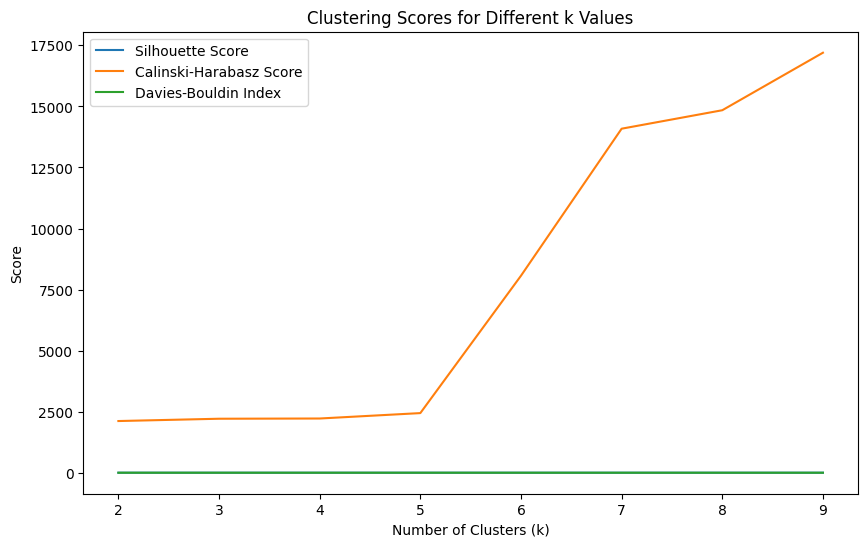

In [21]:
k_values = range(2, 10)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_train, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, label="Silhouette Score")
plt.plot(k_values, calinski_harabasz_scores, label="Calinski-Harabasz Score")
plt.plot(k_values, davies_bouldin_scores, label="Davies-Bouldin Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Clustering Scores for Different k Values")
plt.legend()
plt.show()

A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code.

for k in range (2, 20) :

kmeans = KMeans (n_clusters=k) .fit(X train)

distorsions.append (kmeans. inertia )

plot (distortions) 

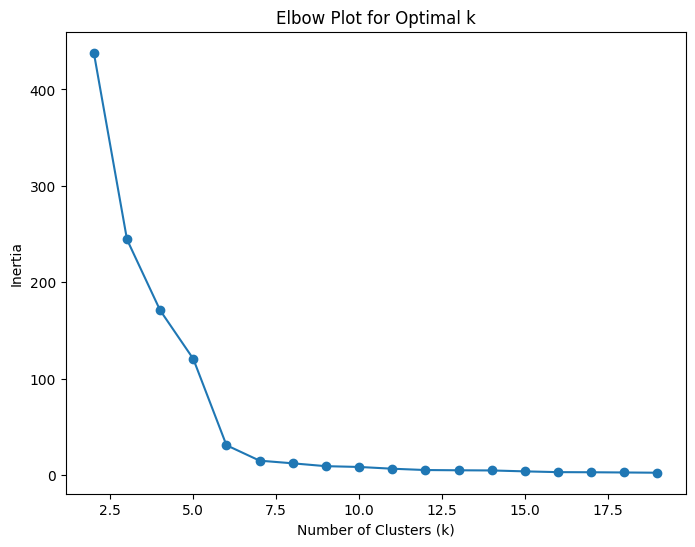

In [22]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Plot for Optimal k")
plt.show()